# Data Analysis & Visualization
## By Adel Samir ElZemity

In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. As it might be obvious, because "they're good dogs." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

In this project, data were gathered, assessed, cleaned and finally combined in one master document.

I am going to address these questions:-
- How are breeds differents in terms of number of retweets and favourate records?

- Does ratings have something to do with favourite counts and retweets?

- How is dog classification related to retweets, favourite counts, and ratings?


In [3]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('twitter_archive_master.csv')

## How are breeds differents in terms of number of retweets and favourate records?


In [6]:
df_breed = df[pd.notnull(df.BreedFirstProbability)]

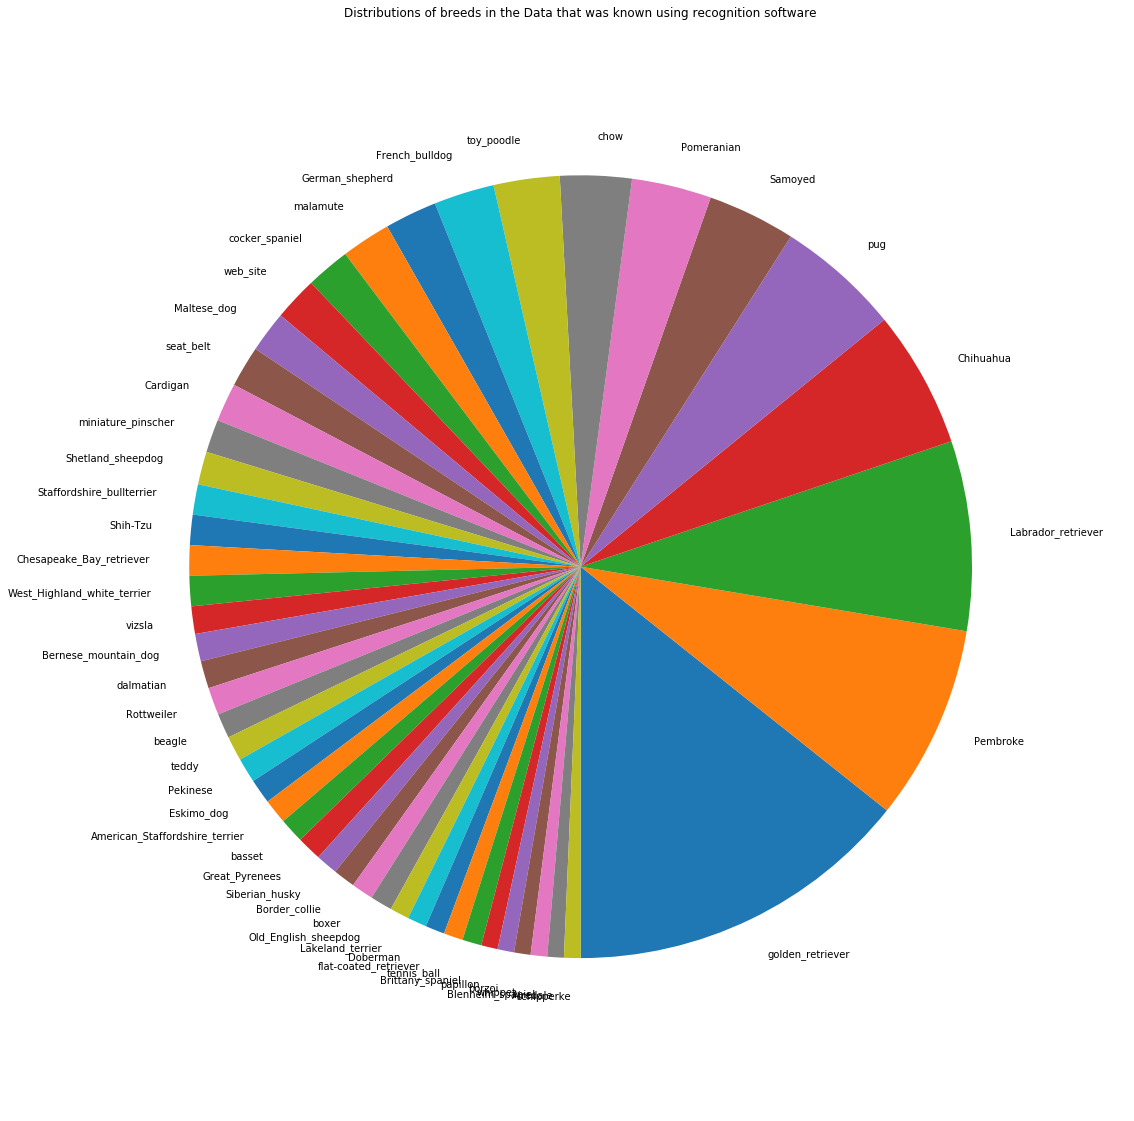

In [7]:
# plotting Piechart
plt.rcParams['figure.figsize']=(20,20)

df_breed.BreedFirstProbability.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds in the Data that was known using recognition software')
plt.ylabel('')
plt.show();

Golden retriever, pembroke, Labrador retriever and Chihuahua are the most common dog breeds. 

## Breeds in terms of favourites

In [10]:
df_fav = df[['BreedFirstProbability','favorite_count']]

In [14]:
df_fav.sort_values('favorite_count', ascending = False).groupby(['BreedFirstProbability'], sort = False).describe().head()

favorite_count                                     \
                               count          mean           std    min   
BreedFirstProbability                                                     
Labrador_retriever              69.0  13143.072464  19556.336568    0.0   
Chihuahua                       50.0   8544.140000  16490.536087    0.0   
French_bulldog                  22.0  18099.363636  23878.067337  341.0   
golden_retriever               126.0  11490.714286  12975.141273    0.0   
Eskimo_dog                       9.0  17148.000000  23181.141026  550.0   

                                                            
                           25%     50%       75%       max  
BreedFirstProbability                                       
Labrador_retriever     2169.00  6569.0  17063.00  131075.0  
Chihuahua              1226.25  3077.0  10564.00  107015.0  
French_bulldog         3315.75  9335.5  25477.00  106827.0  
golden_retriever       3246.00  7479.5  16029.75   85011.0  
Eskimo_dog             3809.00  7908.0  17379.00   75163.0

A dog from the Labrador_retriever breed got the maximum number of favourites (131075).

In [15]:
df_fav2 = df_fav.sort_values('favorite_count', ascending = False).groupby(['BreedFirstProbability'], sort = False).describe()
df_fav2.sort_values(('favorite_count', 'mean'), ascending = False).head()

favorite_count                                      \
                                  count          mean           std     min   
BreedFirstProbability                                                         
French_bulldog                     22.0  18099.363636  23878.067337   341.0   
Eskimo_dog                          9.0  17148.000000  23181.141026   550.0   
Chesapeake_Bay_retriever           11.0  15104.272727  20345.771836   227.0   
Great_Pyrenees                      9.0  14735.333333  13020.559473  1411.0   
basset                              9.0  14534.111111  15284.513056   485.0   

                                                               
                              25%      50%      75%       max  
BreedFirstProbability                                          
French_bulldog            3315.75   9335.5  25477.0  106827.0  
Eskimo_dog                3809.00   7908.0  17379.0   75163.0  
Chesapeake_Bay_retriever  4324.00   7335.0  17379.5   71144.0  
Great_Pyrenees            4802.00  13474.0  24664.0   40325.0  
basset                    1202.00   8842.0  23258.0   41048.0

on average, French_bulldog got more favourites.

In [20]:
df_rtw = df[['BreedFirstProbability','retweet_count']]
df_rtw.sort_values('retweet_count', ascending = False).groupby(['BreedFirstProbability'], sort = False).describe().head()

retweet_count                                    \
                              count         mean           std    min   
BreedFirstProbability                                                   
Labrador_retriever             69.0  5214.434783  10491.457715   96.0   
Chihuahua                      50.0  4398.340000  11005.679309   52.0   
Eskimo_dog                      9.0  7826.555556  16803.662511  163.0   
French_bulldog                 22.0  4933.954545   7415.783261  123.0   
golden_retriever              126.0  3922.103175   4270.381577   54.0   

                                                          
                           25%     50%      75%      max  
BreedFirstProbability                                     
Labrador_retriever      907.00  2269.0  5134.00  79515.0  
Chihuahua               552.50  1328.0  3569.25  56625.0  
Eskimo_dog             1176.00  2243.0  3220.00  52360.0  
French_bulldog          847.75  2705.5  4571.00  32883.0  
golden_retriever       1244.50  2493.0  4887.50  27680.0

Labrador_retriever breed received the maximum number of retweets (79515)

##  Does ratings have something to do with favourite counts and retweets?


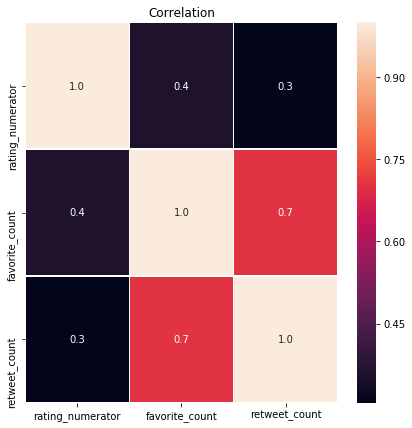

In [23]:
# creating correlation map to investigate the relation between ratings, favs, retweets
import seaborn as sns

f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation');

It's logical to find large correlation between number of retweets and favourites (0.7) but surprisingly people rating small correlation with the retweets and favourites (0.3) That means that regardless of the rating given from the page people still retweet and like.

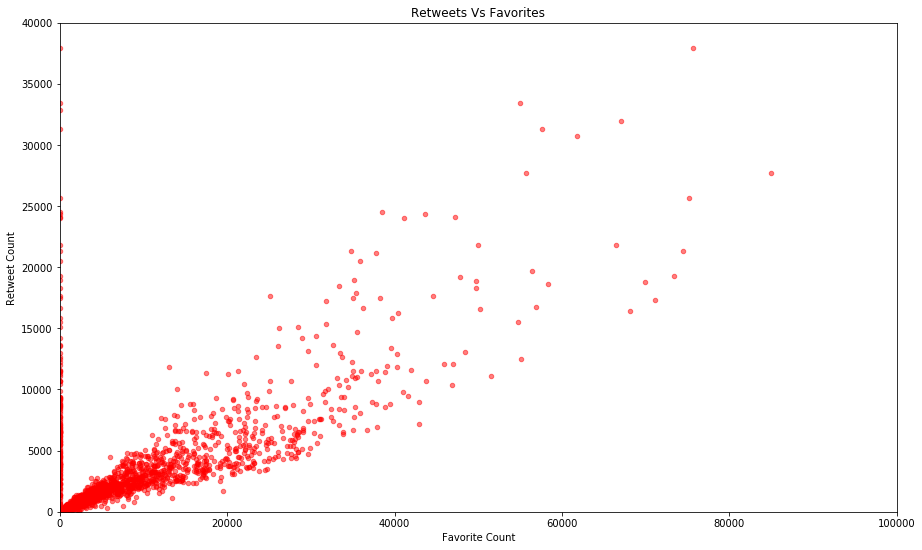

In [24]:
# relation betwwen retweets and favs (scatter plot)
plt.rcParams['figure.figsize']=(15,9)

df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'red')
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Retweets Vs Favorites');

This Scatter Polt confirms the linear relation between number of favourites and retweets.

## Analysing dog classification 

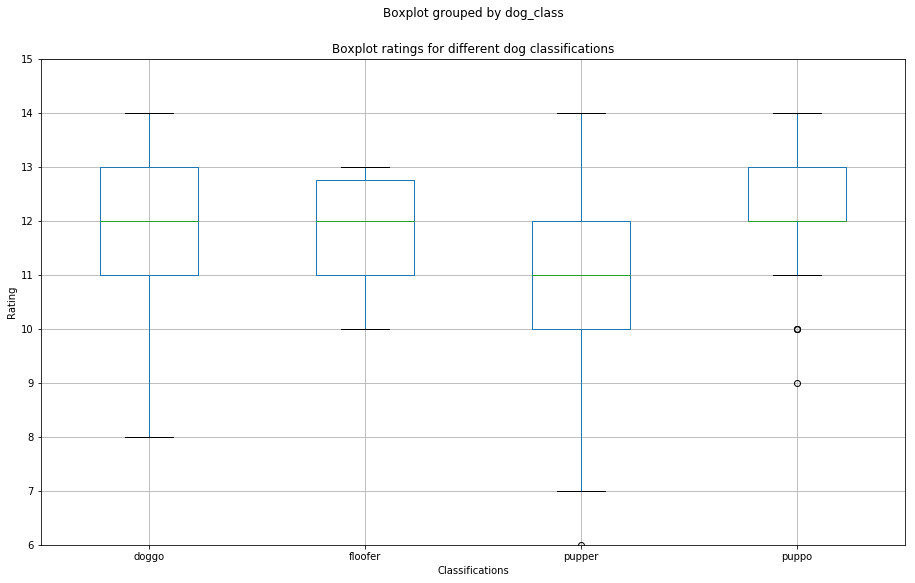

In [25]:
# Plot the dog classification with ratings
plt.rcParams['figure.figsize']=(15,9)
df[pd.notnull(df['dog_class'])].boxplot(column = ['rating_numerator'], by = ['dog_class'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different dog classifications')
plt.xlabel('Classifications')
plt.ylabel('Rating');

Puppo has consistency in rating high and pupper has consistency in rating lower.

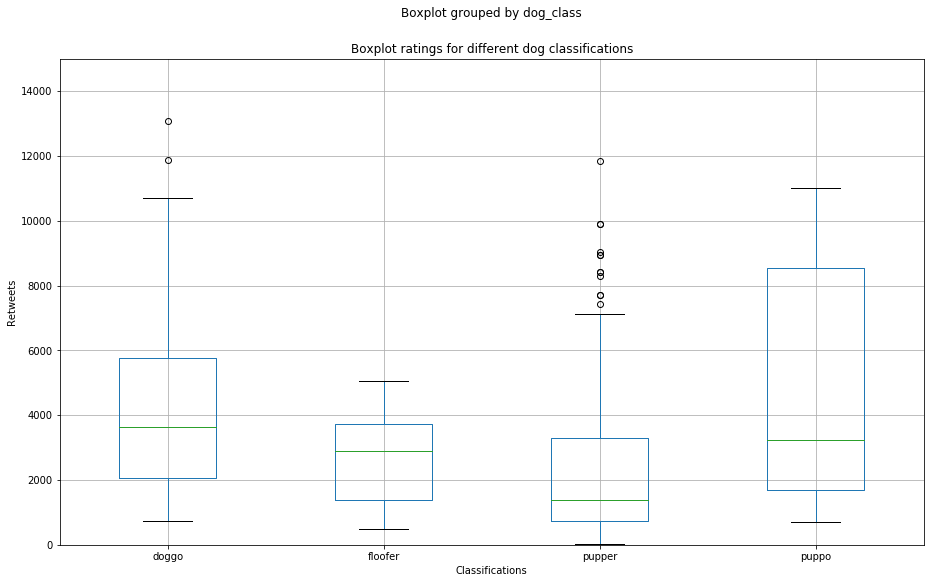

In [28]:
# Plot the dog classification with retweets
plt.rcParams['figure.figsize']=(15,9)
df[pd.notnull(df['dog_class'])].boxplot(column = ['retweet_count'], by = ['dog_class'])
plt.ylim((0,15000))
plt.title('Boxplot ratings for different dog classifications')
plt.xlabel('Classifications')
plt.ylabel('Retweets');

Puppo is again leading the most retweets.

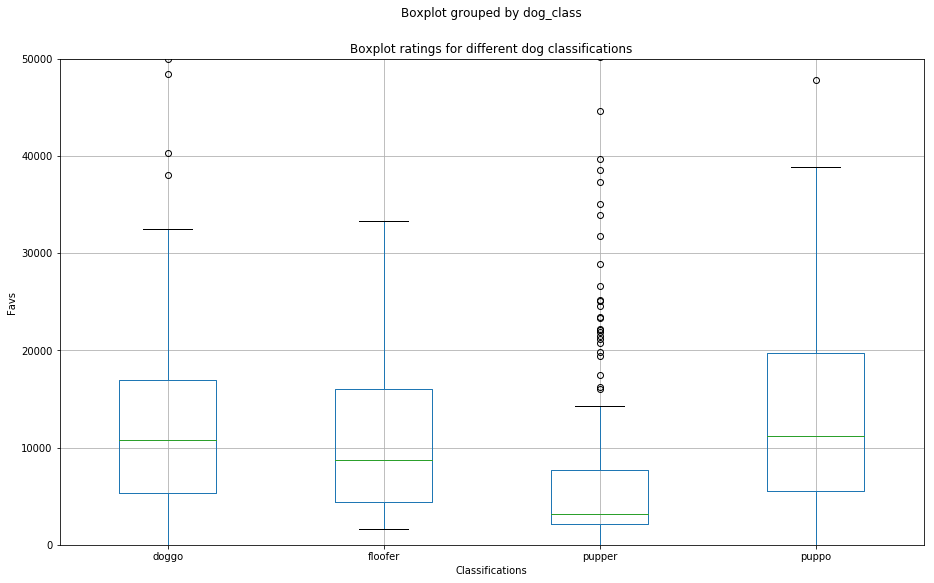

In [30]:
# Plot the dog classification with Favs
plt.rcParams['figure.figsize']=(15,9)
df[pd.notnull(df['dog_class'])].boxplot(column = ['favorite_count'], by = ['dog_class'])
plt.ylim((0,50000))
plt.title('Boxplot ratings for different dog classifications')
plt.xlabel('Classifications')
plt.ylabel('Favs');

Also, Puppo is leading in Favorite counts.

## Conclusion 

- Puppo consistency is high in all (Retweets, Fav Counts, and Ratings). Pupper has consistency with low in ratings. 
- Golden retriever, pembroke, Labrador retriever and Chihuahua are the most common dog breeds.
- there is a linear relationship between the retweet counts and the favourite counts (0.7).
- Rating and retweets has less correlation, thus people don't rely on rating to like or retweet.